### DATA 602 – Final Project Proposal
#### John Ferrara 

##### 1)	Research Question:
This project seeks to identify any relationship between various daily transportation modes (i.e., commuter rail, subway, bus, and motor vehicles). At its heart this analysis seeks to identify if increases in bridge and tunnel traffic coincide with decreases in public transit usage?

##### 2)	Justification – Why is this relevant?
With policies like congestion pricing being implemented and ongoing conversations around how to fund and potentially expand MTA services, understanding commuter behavior is more important than ever. Looking at how people are choosing to get around and understanding how these modes interact can help inform smarter public policy decisions.

##### 3)	Data Sources:
The data source for my project will be data directly from the MTA pulled from data.ny.gov. The “MTA Daily Ridership Data: 2020 – 2025” is the data set being used. The about page for this data is here: https://data.ny.gov/Transportation/MTA-Daily-Ridership-Data-2020-2025/vxuj-8kew/about_data 

##### 4)	Libraries Being Used:
The Python libraries being used will most likely include, but will not be limited to: pandas, matplotlib, numpy, and requests.

##### 5)	Exploratory Data Analysis and Statistics
See code and plots below. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [7]:
## Reading in NYC MTA ridership data. (https://data.ny.gov/Transportation/MTA-Daily-Ridership-Data-2020-2025/vxuj-8kew/about_data)
## Website says 1776 rows of data.
results= []
#Offset 1000 rows per call, total rows are 1,776
base_url = "https://data.ny.gov/resource/vxuj-8kew.json"
url_suffix = "?$offset=" # Need to do this for getting all data via api; can also use'?$limit='
total_rows = 1776
response = requests.get(base_url)
pull = pd.DataFrame(response.json())
results.append(pull)
for i in range(0, total_rows+1, len(pull)):
    print(i)
    if i == 0:
        continue
    else:
        response = requests.get(base_url+url_suffix+str(i))
        pull = pd.DataFrame(response.json())
        results.append(pull)
mta_rider = pd.concat(results).drop_duplicates()

0
1000


In [37]:
print("DataFrame Shape: ",mta_rider.shape)
print("__ mta_rider df info: __")
print(mta_rider.info())

DataFrame Shape:  (1776, 15)
__ mta_rider df info: __
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 775
Data columns (total 15 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   date                                                  1776 non-null   object
 1   subways_total_estimated_ridership                     1776 non-null   object
 2   subways_of_comparable_pre_pandemic_day                1776 non-null   object
 3   buses_total_estimated_ridersip                        1776 non-null   object
 4   buses_of_comparable_pre_pandemic_day                  1776 non-null   object
 5   lirr_total_estimated_ridership                        1776 non-null   object
 6   lirr_of_comparable_pre_pandemic_day                   1776 non-null   object
 7   metro_north_total_estimated_ridership                 1776 non-null   object
 8   metro_north_of_

In [34]:
## Summary Statistics 
## Date Coverage
print("Date Coverage Range")
print(mta_rider['date'].min())
print(mta_rider['date'].max())
## Subway Riders
print("__ Subway Ridership __")
print("Mean: ", round(mta_rider['subways_total_estimated_ridership'].astype(int).mean(),2))
print("Median: ",round(mta_rider['subways_total_estimated_ridership'].astype(int).median(),2))
print("Min: ", mta_rider['subways_total_estimated_ridership'].astype(int).min())
print("Max:", mta_rider['subways_total_estimated_ridership'].astype(int).max())
print("Standard Dev: ",round(mta_rider['subways_total_estimated_ridership'].astype(int).std(),0))
## SI Rail
print("__ Staten Island Rail __")
print("Mean: ", round(mta_rider['staten_island_railway_total_estimated_ridership'].astype(int).mean(),2))
print("Median: ",round(mta_rider['staten_island_railway_total_estimated_ridership'].astype(int).median(),2))
print("Min: ", mta_rider['staten_island_railway_total_estimated_ridership'].astype(int).min())
print("Max:", mta_rider['staten_island_railway_total_estimated_ridership'].astype(int).max())
print("Standard Dev: ",round(mta_rider['staten_island_railway_total_estimated_ridership'].astype(int).std(),2))
## Bus Riders
print("__ Bus Ridership __")
print("Mean: ", round(mta_rider['buses_total_estimated_ridersip'].astype(int).mean(),2))
print("Median: ", round(mta_rider['buses_total_estimated_ridersip'].astype(int).median(),2))
print("Min: ", mta_rider['buses_total_estimated_ridersip'].astype(int).min())
print("Max: ", mta_rider['buses_total_estimated_ridersip'].astype(int).max())
print("Standard Dev: ", round(mta_rider['buses_total_estimated_ridersip'].astype(int).std()))
## Motor Vehicle Est. (bridges_and_tunnels_total_traffic)
print("__ Traffic / Vehicle __")
print("Mean: ", round(mta_rider['bridges_and_tunnels_total_traffic'].astype(int).mean(),2))
print("Median: ", round(mta_rider['bridges_and_tunnels_total_traffic'].astype(int).median(),2))
print("Min: ", mta_rider['bridges_and_tunnels_total_traffic'].astype(int).min())
print("Max: ", mta_rider['bridges_and_tunnels_total_traffic'].astype(int).max())
print("Standard Dev: ",round(mta_rider['bridges_and_tunnels_total_traffic'].astype(int).std(),2))
      
      

Date Coverage Range
2020-03-01T00:00:00.000
2025-01-09T00:00:00.000
__ Subway Ridership __
Mean:  2541830.26
Median:  2505354.0
Min:  198399
Max: 5498809
Standard Dev:  1067641.0
__ Staten Island Rail __
Mean:  4491.96
Median:  4568.5
Min:  0
Max: 17453
Standard Dev:  2700.11
__ Bus Ridership __
Mean:  1011409.18
Median:  1143659.0
Min:  5498
Max:  2244515
Standard Dev:  436980
__ Traffic / Vehicle __
Mean:  857259.62
Median:  897212.0
Min:  156759
Max:  1043802
Standard Dev:  141210.05


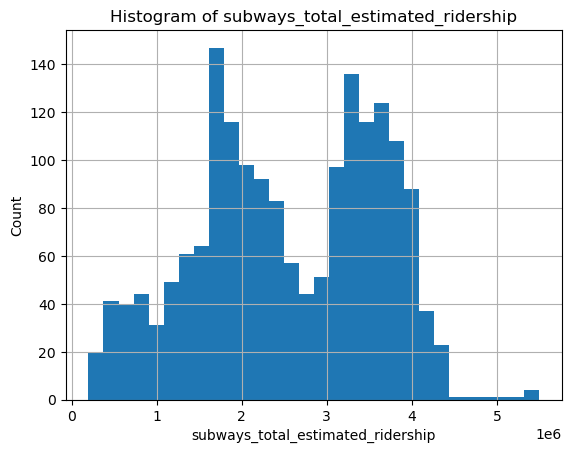

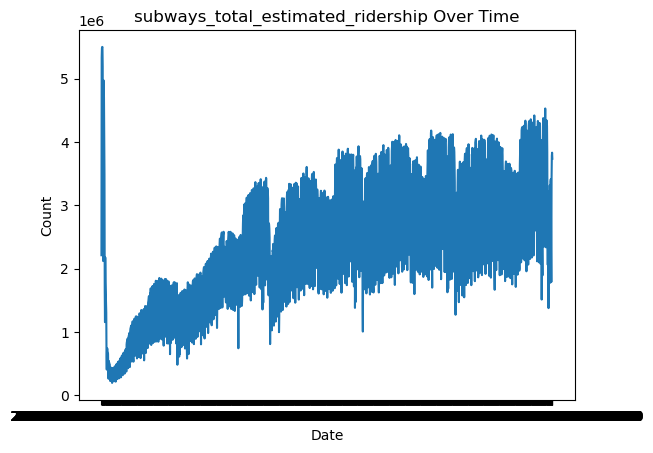

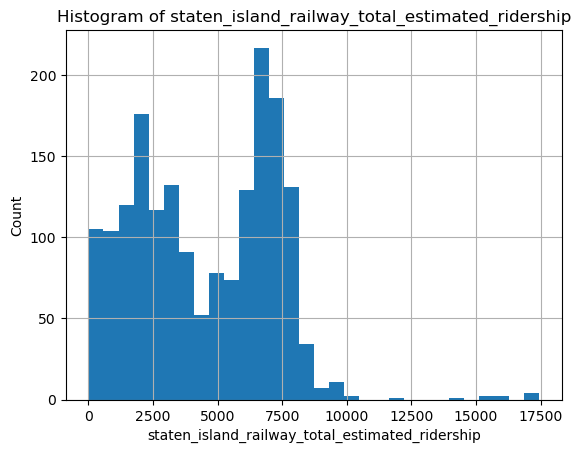

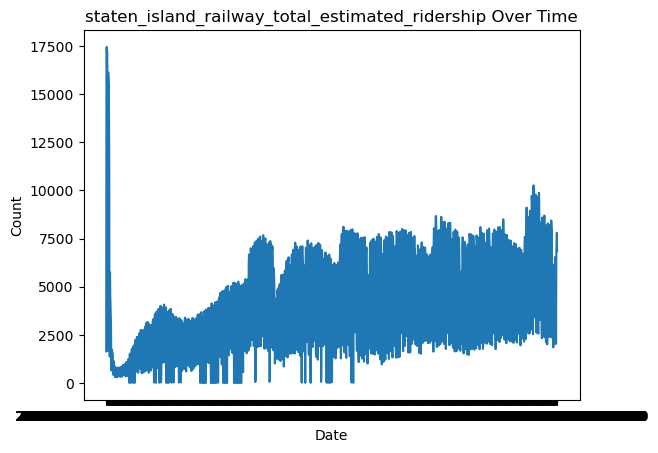

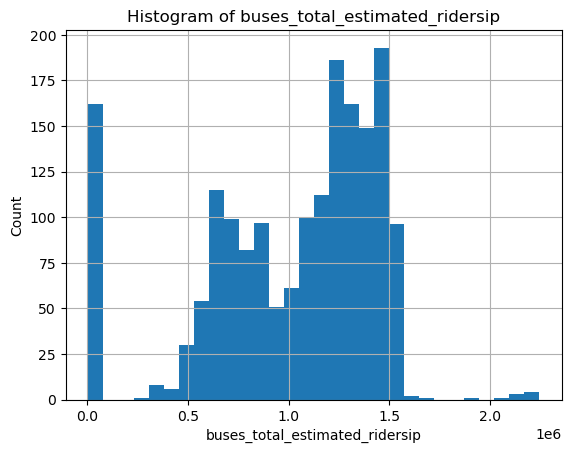

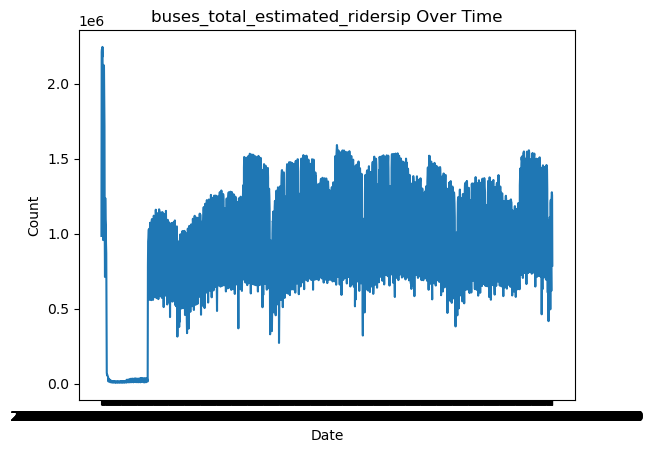

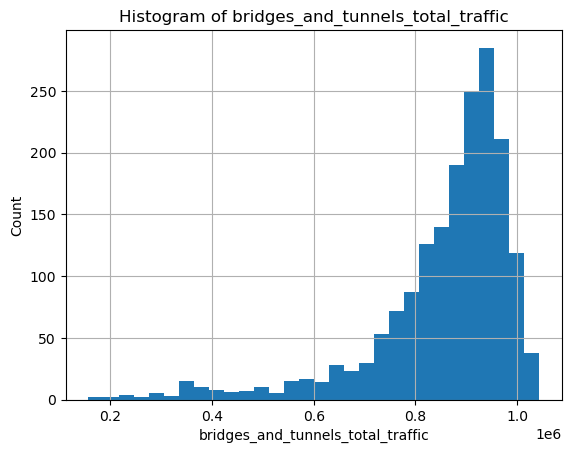

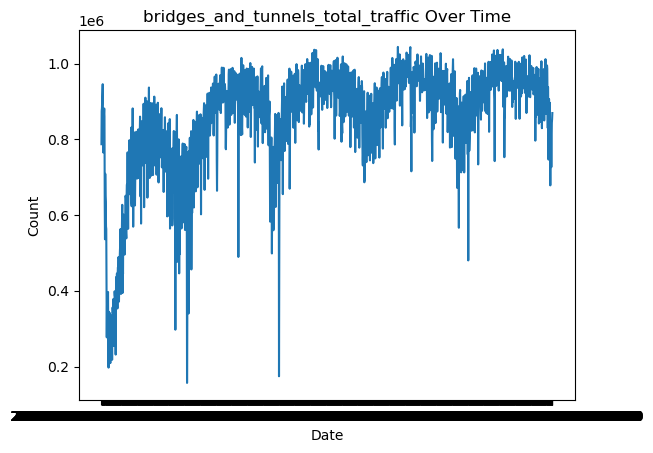

In [43]:
## Basic Prelim Charts for Proposal to show frequncy of amounts
columns_to_plot = [
    'subways_total_estimated_ridership',
    'staten_island_railway_total_estimated_ridership',
    'buses_total_estimated_ridersip',
    'bridges_and_tunnels_total_traffic'
]

for col in columns_to_plot:
    ## Histogram
    mta_rider[col].astype(int).hist(bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
    ## Line chart 
    plt.plot(mta_rider['date'], mta_rider[col].astype(int))
    plt.title(f'{col} Over Time')
    plt.xlabel("Date")
    plt.ylabel('Count')
    plt.show()